# Worksheet 12

Name: Ziye Chen  
UID: U98411098 

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1. Yes, it is a binary classification
2. No, it is a regression
3. Yes, it is a classification between 1 to 5
4. No, it is a regression

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

Divide the dataset into training set and testing set. To train the model, use the training data and evaluate the model's performance using testing data. This process can be repeated using cross validation.

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

1. Underfitting: Model performs similarly well with training data and testing data. Model is too simple and low in dimensions.
2. Overfitting: Model is too focused on training data and therefore cannot perform well when unseen data is inputted. Model is too complex and high in dimensions.

### K Nearest Neighbors

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

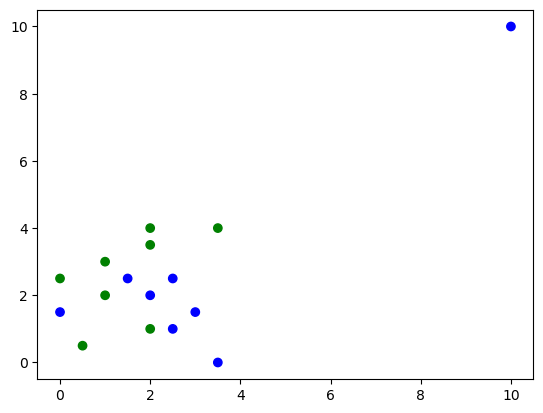

In [3]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data['Attribute A'], data['Attribute B'], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

A point on top-right corner is a possible outlier

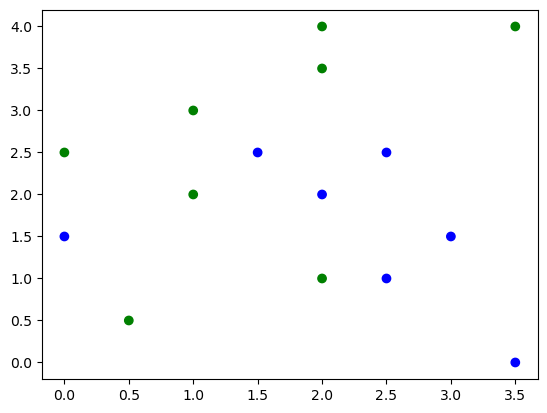

In [4]:
for key in data:
    data[key] = data[key][:-1]

colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"],data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

No points seem to be possible noise points.

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

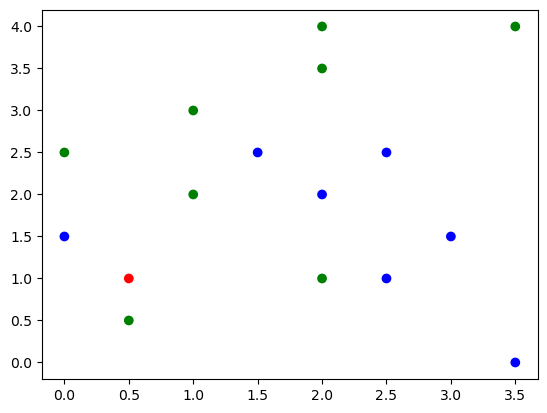

In [5]:
data["Attribute A"].append(0.5)
data["Attribute B"].append(1)
data["Class"].append(2)

plt.scatter(data["Attribute A"],data["Attribute B"], color=colors[data["Class"]].tolist())

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

(0.5, 1) 1.118033988749895


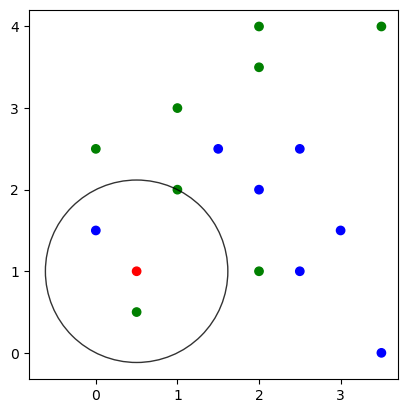

In [45]:
def distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def n_closest_to(example, n, data):
    distances=[]
    point_in_dataset=False
    
    for i in range(len(data['Class'])):
        if data['Attribute A'][i] ==  example[0] and data['Attribute B'][i]==example[1]:
            point_in_dataset=True
            break


    for i in range(len(data['Class'])):
        distances.append([data['Attribute A'][i], data['Attribute B'][i], 
                          distance(example, (data['Attribute A'][i], data['Attribute B'][i])),
                          data['Class'][i]
                          ])

    distances = sorted(distances, key=lambda x:x[2])
    #print(distances[n])
    
    if point_in_dataset:
        return distances[1:1+n], distances[n][2]
    else:
        return distances[0:n], distances[n-1][2]
    
    

location = ( 0.5 , 1)

closest_points,radius = n_closest_to(location, 3, data)
_, axes = plt.subplots()
axes.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
cir = plt.Circle(location, radius, fill = False, alpha=0.8)
print(location, radius,)
axes.add_patch(cir)
axes.set_aspect('equal') # necessary so that the circle is not oval
plt.show()


f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [47]:
def majority(points):
    fout = dict()
    for po in points:
        cl = po[3]
        if cl in fout:
            fout[cl] += 1
        else:
            fout[cl] = 1
    pp = sorted(fout.items(), key=lambda x:x[1], reverse=True)

    return pp[0][0]

print(majority(closest_points))

1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [48]:
from copy import deepcopy

count = 0
training_set = deepcopy(data)

for i in range(len(data['Class'])):
    actual_class = data["Class"][i]
    
    a_val = training_set["Attribute A"][i]
    b_val = training_set["Attribute B"][i]

    closest_points, radius = n_closest_to((a_val, b_val), 3, training_set)

    prediction = majority(closest_points)

    if prediction == actual_class:
        count += 1

print(f"overall accuracy = {round(count / len(data['Class']), 2) * 100}%")

overall accuracy = 62.0%


## Challenge Problem

For this question we will re-use the "mnist_784" dataset.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from).

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


b) For K ranging from 1 to 20:

1. train a KNN on the training data
2. record the training and testing accuracy

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are already defined

# Lists to store accuracies
training_accuracies = []
testing_accuracies = []

# Range of k
k_range = range(1, 21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predict on training set and calculate accuracy
    y_train_pred = knn.predict(X_train)
    training_accuracy = accuracy_score(y_train, y_train_pred)
    training_accuracies.append(training_accuracy)
    
    # Predict on testing set and calculate accuracy
    y_test_pred = knn.predict(X_test)
    testing_accuracy = accuracy_score(y_test, y_test_pred)
    testing_accuracies.append(testing_accuracy)


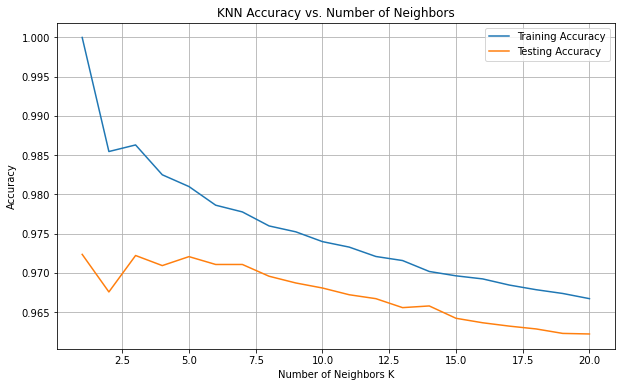

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, training_accuracies, label='Training Accuracy')
plt.plot(k_range, testing_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()


The graph shows that the testing accuracy peaks around K=3, generally trending flats. Therefore, K=3 is likely the optimal choice, as it balances model complexity and generalization to new data.

c) Using the best model from b), pick an image at random and plot it next to its K nearest neighbors

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Assume knn is your trained KNN classifier with K=3
# Also assume that X_test is the testing set you created earlier

# Select a random image from the test set
np.random.seed(1)

random_index = np.random.randint(len(X_test))
print(random_index)
random_image = X_test[random_index].reshape(1, -1)

# Find the K nearest neighbors of this image
neighbors = knn.kneighbors(random_image, n_neighbors=3)


13349


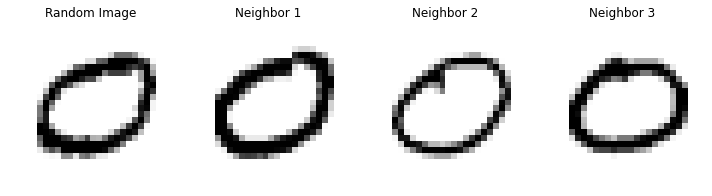

In [13]:
# Plot the random image and its K nearest neighbors
fig, axes = plt.subplots(1, 4, figsize=(10, 3))

# Plot the random image
axes[0].imshow(random_image.reshape(28, 28), cmap=plt.cm.gray_r)
axes[0].set_title('Random Image')
axes[0].axis('off')

# Plot each of the K nearest neighbors
for i, (neighbor_index, _) in enumerate(zip(neighbors[1][0], neighbors[0][0])):
    neighbor_image = X_train[neighbor_index].reshape(28, 28)
    axes[i+1].imshow(neighbor_image, cmap=plt.cm.gray_r)
    axes[i+1].set_title(f'Neighbor {i+1}')
    axes[i+1].axis('off')

plt.tight_layout()
plt.show()

d) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat b) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension and why you think the performance / accuracy of the model has changed.

In [14]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Lists to store accuracies for PCA-reduced data
training_accuracies_pca = []
testing_accuracies_pca = []

# Range of k
k_range = range(1, 21)

for k in k_range:
    
    # Create a PCA object to reduce dimensionality. Let's keep 95% of variance
    pca = PCA(n_components=25)
    # Create a KNN classifier
    knn_model = KNeighborsClassifier(n_neighbors=k)
    # Make a pipeline
    model = make_pipeline(pca, knn_model)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on training and testing set
    y_train_pred_pca = model.predict(X_train)
    y_test_pred_pca = model.predict(X_test)
    
    # Calculate and store accuracies
    training_accuracies_pca.append(accuracy_score(y_train, y_train_pred_pca))
    testing_accuracies_pca.append(accuracy_score(y_test, y_test_pred_pca))



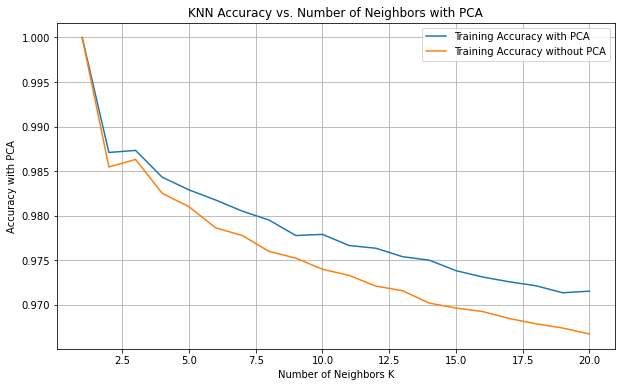

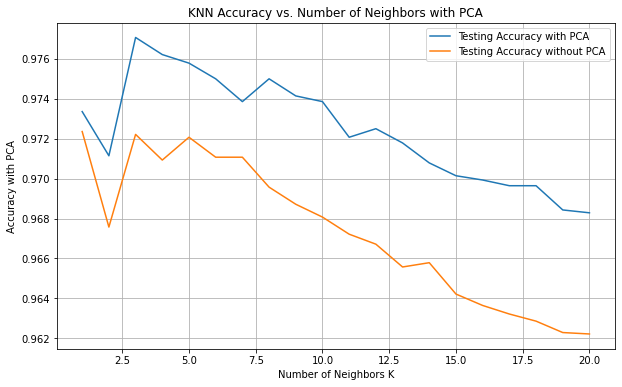

In [15]:
# Plotting the results for PCA-reduced data
plt.figure(figsize=(10, 6))
plt.plot(k_range, training_accuracies_pca, label='Training Accuracy with PCA')
plt.plot(k_range, training_accuracies, label='Training Accuracy without PCA')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy with PCA')
plt.title('KNN Accuracy vs. Number of Neighbors with PCA')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(k_range, testing_accuracies_pca, label='Testing Accuracy with PCA')
plt.plot(k_range, testing_accuracies, label='Testing Accuracy without PCA')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy with PCA')
plt.title('KNN Accuracy vs. Number of Neighbors with PCA')
plt.legend()
plt.grid(True)
plt.show()

The choice of 25 dimensions via PCA for the MNIST dataset likely aimed to reduce complexity and improve computational efficiency. The graphs show a noticeable decrease in accuracy without PCA, both in training and testing, compared to the model with PCA. It is because PCA helps KNN reduce interference.

## Midterm Prep (Part 1)

Compete in the Titanic Data Science Competition on Kaggle: https://www.kaggle.com/c/titanic 

Requirements:

1. Add at least 2 new features to the dataset (explain your reasoning below)
2. Use KNN (and only KNN) to predict survival
3. Explain your process below and choice of K
4. Make a submission to the competition and provide a link to your submission below.
5. Show your code below

https://www.kaggle.com/code/ziechan/cs506midterm?scriptVersionId=167042978

1. Dealing with Missing Values in Cabin, Age, and Embarked.
2. Feature Engineering:
- Combine SibSp (number of siblings/spouses aboard) and Parch (number of parents/children aboard) to create a FamilySize feature.
- Create an IsAlone feature, which is 1 if the passenger is alone (i.e., FamilySize is 0) and 0 otherwise.
3. Dropping Features:
- Drop the Name and Ticket features, which are less relevant for predicting survival.
4. Model Training:
- Train a K-Nearest Neighbors (KNN) model to predict survival outcomes.


The graph shows that the testing accuracy peaks around K=5, generally trending flats. Therefore, K=5 is likely the optimal choice, as it balances model complexity and generalization to new data.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

train_ds = pd.read_csv('/kaggle/input/titanic/train.csv')
test_ds = pd.read_csv('/kaggle/input/titanic/test.csv')

def inspect_missing_values(df):
    index_names = ["Total", "Missing %", "Data type"]
    columns = df.columns
    missing_values_table = pd.DataFrame(index=index_names, columns=columns)
    for col in columns:
        missing_data = df[col].isnull().sum()
        missing_data_percentage = round((missing_data/df.shape[0])*100, 2)
        missing_values_table.loc[index_names[0],col] = df[col].isnull().sum()
        missing_values_table.loc[index_names[1],col] = missing_data_percentage
        missing_values_table.loc[index_names[2],col] = df[col].dtype
    return missing_values_table 

In [ ]:
def display_custom_palette(colors):
    custom_cmap = ListedColormap(colors)
    print("Custom Color Palette Display:")
    sns.palplot(sns.color_palette(colors))
    plt.show()

In [ ]:
missing_values_train = inspect_missing_values(train_ds)
missing_values_train

In [ ]:
missing_values_test = inspect_missing_values(test_ds)
missing_values_test

In [ ]:
import re

# Define the deck level dictionary
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

# Create a list of datasets
data = [train_ds, test_ds]

for dataset in data:
    # Fill missing Cabin values with 'U0'
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    
    # Extract the first sequence of letters which represents the Deck and map it to a number
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    
    # Fill missing Deck values with 0
    dataset['Deck'] = dataset['Deck'].fillna(0)
    
    # Convert Deck to an integer type
    dataset['Deck'] = dataset['Deck'].astype(int)
    
    # Drop the Cabin column as it's no longer needed
    dataset.drop(['Cabin'], axis=1, inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

data = [train_ds, test_ds]
for dataset in data:
    dataset['Age'] = imputer.fit_transform(dataset['Age'].values.reshape(-1, 1))
    dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])  
    dataset['Fare'] = (dataset['Fare'].fillna(0)).astype(int)

data = [train_ds, test_ds]
for dataset in data:
    dataset['isAlone'] = (dataset['SibSp'] + dataset['Parch'] == 0).astype(int)
    dataset['isFamily'] = (dataset['SibSp'] + dataset['Parch'] > 0).astype(int)

columns_to_drop = ['Name', 'Ticket']

data = [train_ds, test_ds]

for dataset in data:
    dataset.drop(columns=columns_to_drop, inplace=True)

In [ ]:
def category_mapping(data):
  mapping = {
    'Sex': {'male': 0, 'female': 1},
    'Embarked': {'S': 0, 'C': 1, 'Q': 2},
  }

  # loop over each dataframe in the list
  for df in data:
    # map the categorical features to numerical values using the mapping dict
    for feature, value in mapping.items():
      df[feature] = df[feature].map(value)

  return data

data = category_mapping([train_ds, test_ds])

In [ ]:
# split the train_ds into features and target
X = train_ds.drop(columns='Survived')
y = train_ds['Survived'].astype(int)

In [ ]:
from sklearn.model_selection import train_test_split

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are already defined

# Lists to store accuracies
training_accuracies = []
testing_accuracies = []

# Range of k
k_range = range(1, 21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predict on training set and calculate accuracy
    y_train_pred = knn.predict(X_train)
    training_accuracy = accuracy_score(y_train, y_train_pred)
    training_accuracies.append(training_accuracy)
    
    # Predict on testing set and calculate accuracy
    y_test_pred = knn.predict(X_test)
    testing_accuracy = accuracy_score(y_test, y_test_pred)
    testing_accuracies.append(testing_accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, training_accuracies, label='Training Accuracy')
plt.plot(k_range, testing_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Predict on training set and calculate accuracy
predictions = knn.predict(test_ds)
output = pd.DataFrame({'PassengerId': test_ds.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")